In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
train = pd.read_csv('../data/raw/train.csv')

In [3]:
#explanitory analysis (EDA)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
train.shape

(1460, 81)

In [7]:
#Display unique counts per column with formatted output
train.nunique().to_frame().rename(columns={0: 'Unique Values'}).style.format({'Unique Values': '{:,.0f}'})

,Unique Values
Id,"1,460"
MSSubClass,15
MSZoning,5
LotFrontage,110
LotArea,"1,073"
Street,2
Alley,2
LotShape,4
LandContour,4
Utilities,2


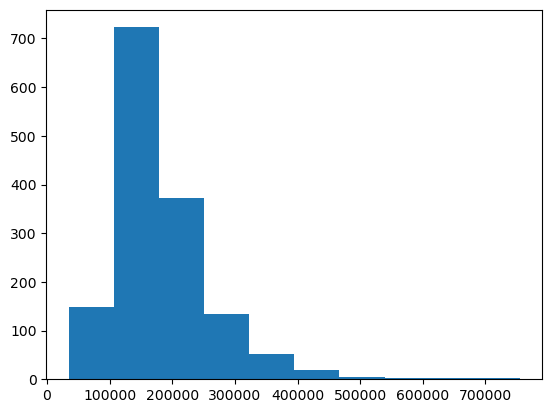

34900

In [14]:
# looking at the response variable. The data is positivly sqewed. Maybe there are some outliers. 
plt.hist(train['SalePrice'])
plt.show()
train['SalePrice'].min()

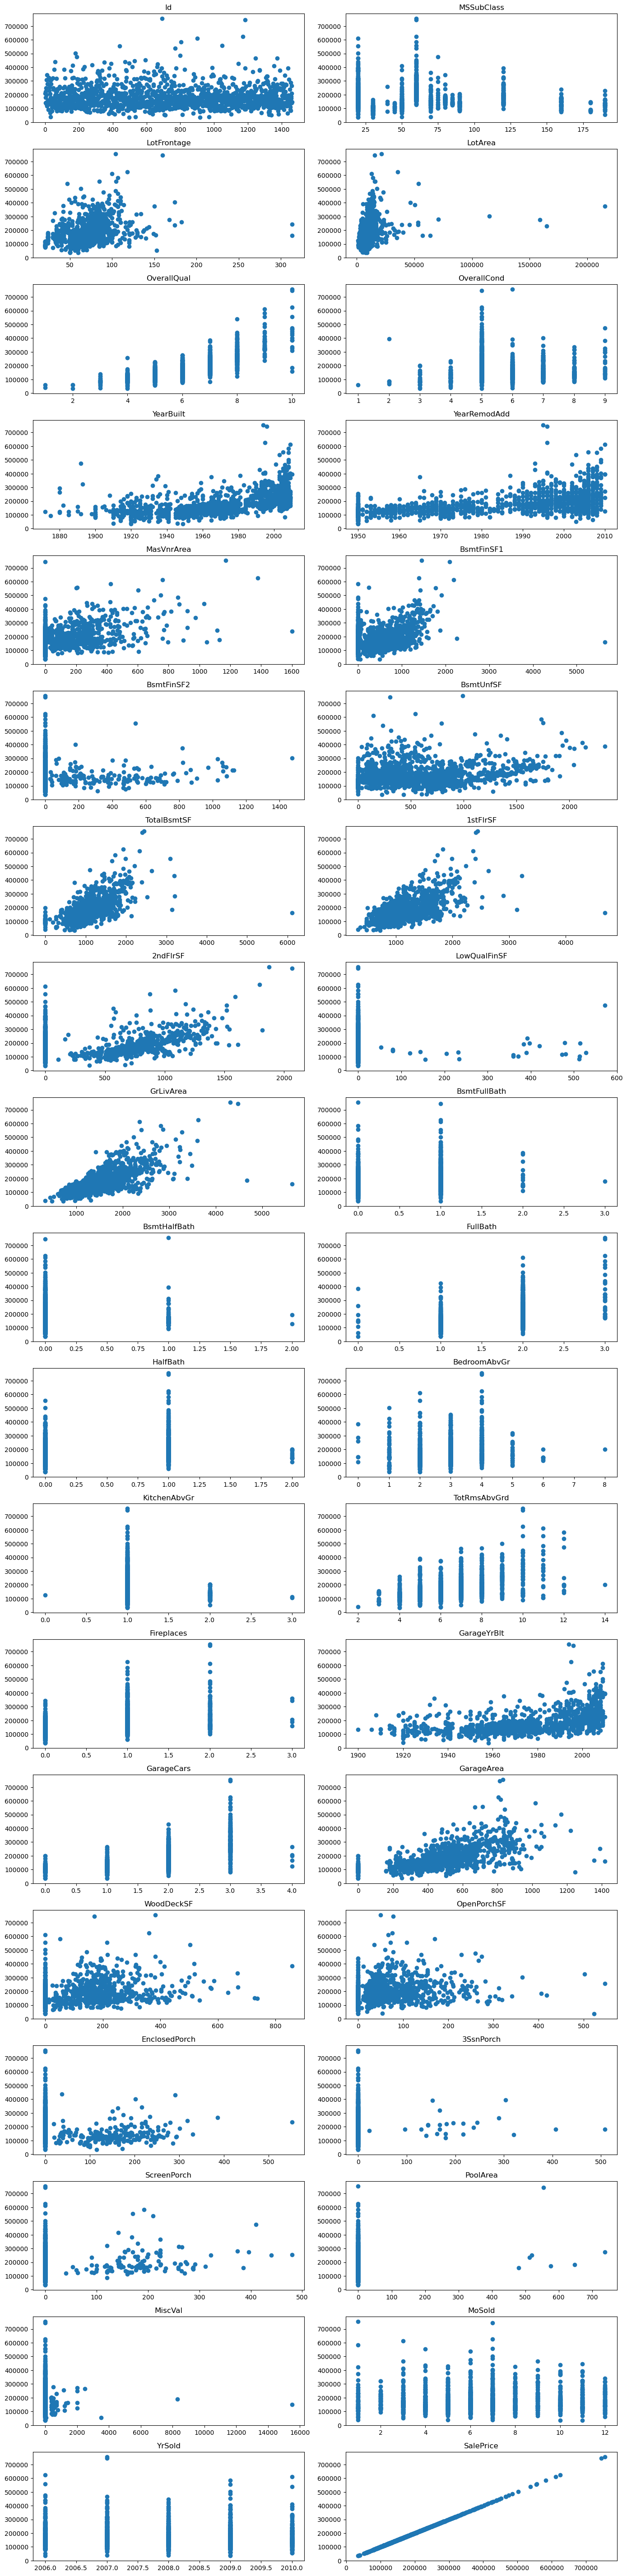

In [9]:
#explore the correlation of each vairable to the sale price

# Identify numerical columns
numerical_columns = train.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    plt.scatter( train[feature],train['SalePrice'])
    plt.title(f"{feature}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#Thigs that Positivily affect the sale price: 
#TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageArea

#Things that have no effect (or too few information)- consider dropping these features. 
#MiscVal, PoolArea

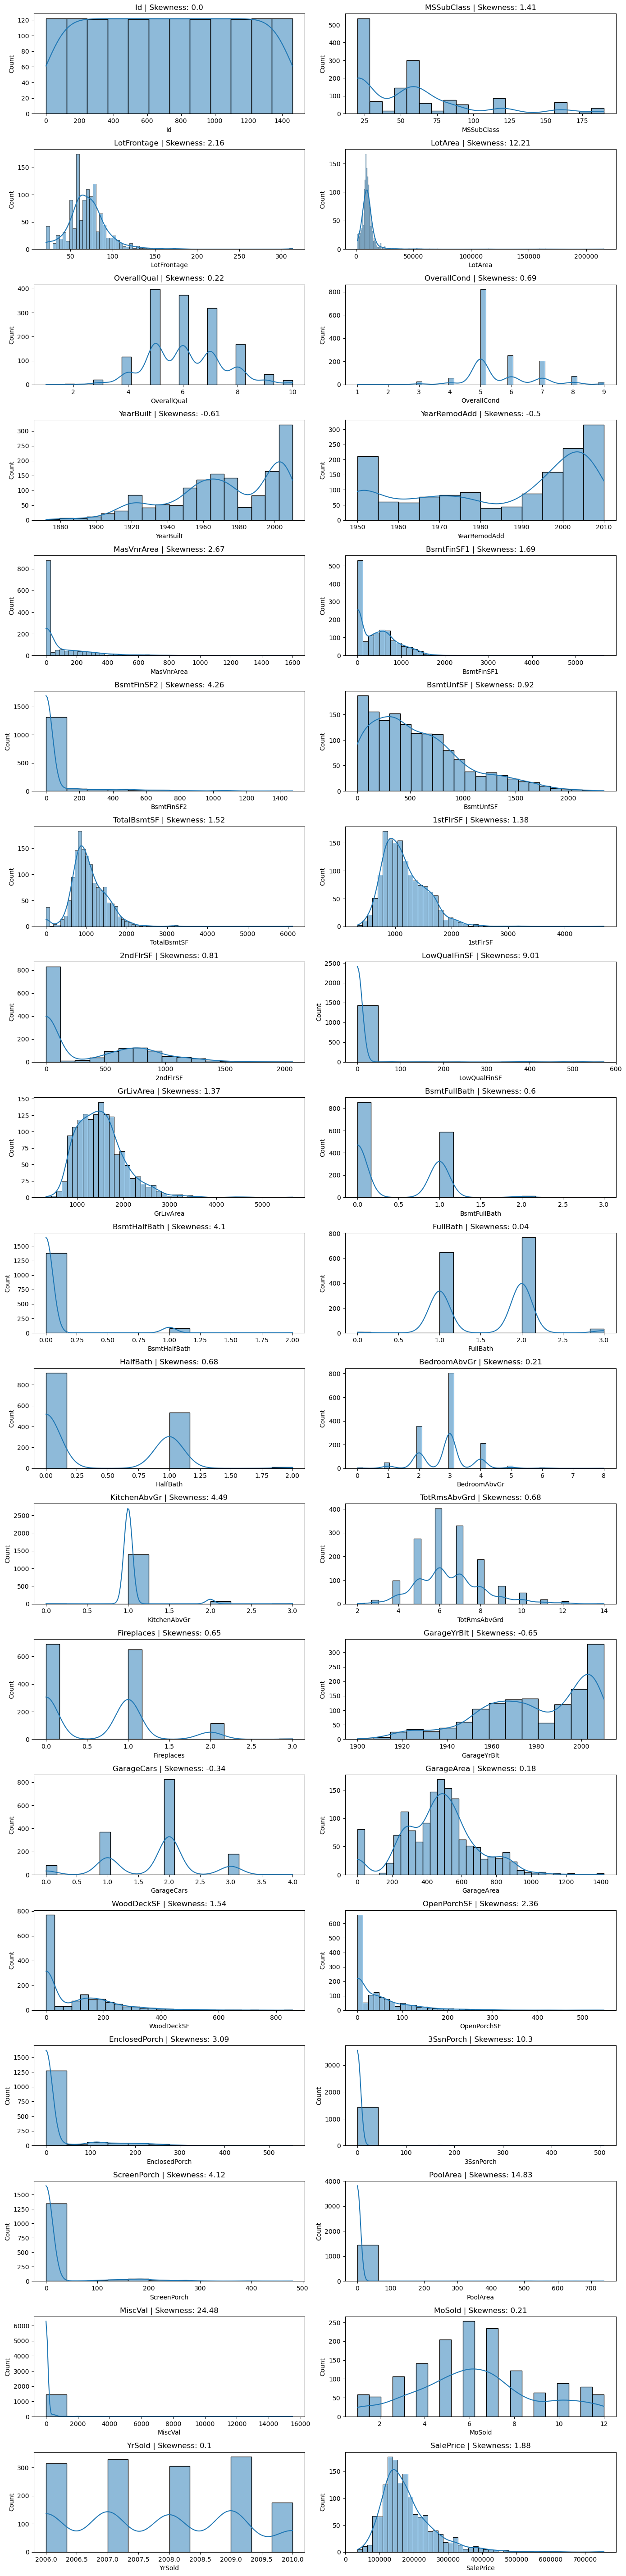

In [10]:
#exploring the sqewness of the vairables

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(train[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(train[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

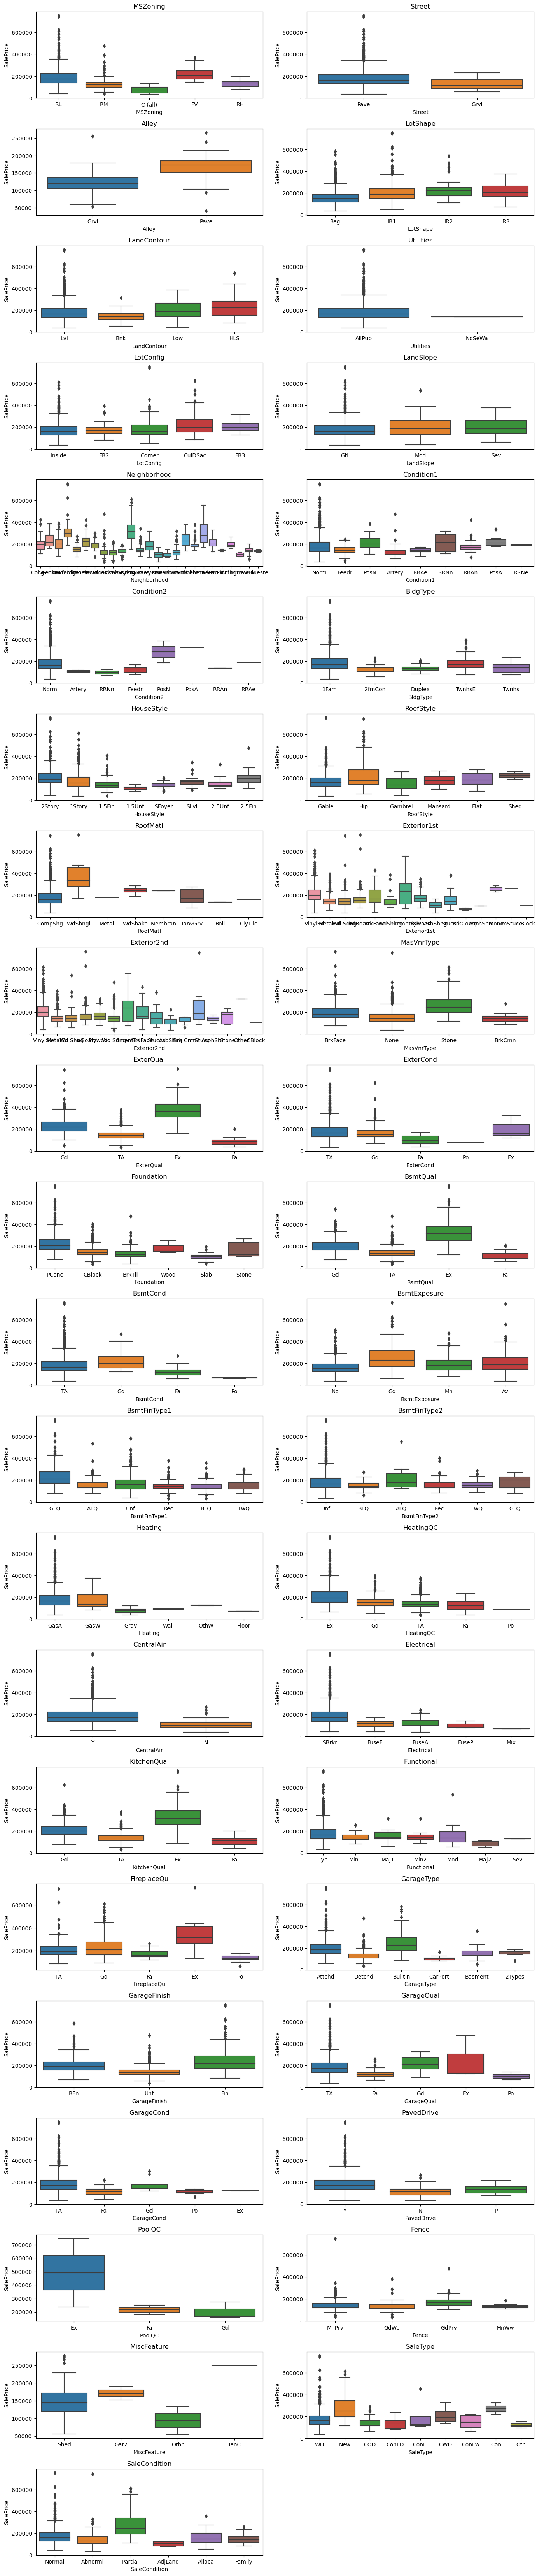

In [11]:
#explore non numerical features:
# Identify non-numberical columns
non_numerical_columns = train.select_dtypes(include=['object']).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(non_numerical_columns) * 3))
for idx, feature in enumerate(non_numerical_columns, 1):
    plt.subplot(len(non_numerical_columns), 2, idx)
    sns.boxplot(x=train[feature], y=train['SalePrice'])
    plt.title(f"{feature}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#NA has been left out. Can we find a way to keep it in?

#Zone RL is most expensive, Street Pave is most expensive, paved alleys are more expensive, 2 story, 
#exc qualatiy material of external,basement, heating and air con, good kitchen, fireplace,  

In [23]:
#Explore category cardinality. Most are low so one hot encoding is ok.
non_numerical_columns = train.select_dtypes(include=['object']).nunique()
non_numerical_columns[non_numerical_columns > 10]


Neighborhood    25
Exterior1st     15
Exterior2nd     16
dtype: int64